In [5]:
from braket.circuits import Circuit
from braket.devices import LocalSimulator
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

device = LocalSimulator()

In [6]:
qt = Circuit()

# Initial State 

#qt.i(0)            # Initial State is 0
#qt.x(0)             # Initial State is 1
#qt.h(0)             # Initial State is a 50:50 superposition
#qt.h(0).t(0).h(0)     # Initial State is 85:15 superposition
qt.h(0).t(0).z(0).h(0) # Initial State is 15:85 superposition
#qt.ry(0,2*np.pi/5)      # Initial State is 66:33 superposition
######



# Prepare a Bell state between qubits 1 &2. Qubit 0 & 1 is with Alice. Qubit 2 is with Bob

qt.h(1).cnot(1,2)

# Add CNOT and Hadamard to Alice's part of the circuit

qt.cnot(0,1)
qt.h(0)


# Add Conditional gates to Bob's Qubit
qt.cnot(1,2)
qt.cz(0,2)
print(qt)



T  : |0|1|2|3|4|5|6|
                    
q0 : -H-T-Z-H-C-H-C-
              |   | 
q1 : -H-C-----X-C-|-
        |       | | 
q2 : ---X-------X-Z-

T  : |0|1|2|3|4|5|6|


## Now run the circuit

In [8]:
task = device.run(qt,shots=1000)

In [9]:
while task.state() != "COMPLETED" :
    print(task.state())
    time.sleep(1)
print(task.state())

COMPLETED


measurement_counts: Counter({'101': 228, '111': 225, '011': 208, '001': 193, '010': 41, '110': 38, '100': 34, '000': 33})

measurement_probabilities: {'001': 0.193, '111': 0.225, '011': 0.208, '110': 0.038, '101': 0.228, '010': 0.041, '000': 0.033, '100': 0.034}



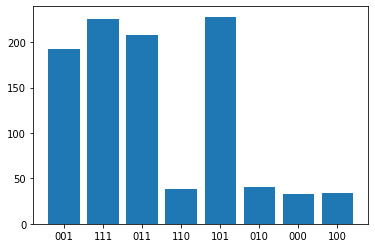

In [11]:
result = task.result()
print(f"measurement_counts: {result.measurement_counts}\n")
print(f"measurement_probabilities: {result.measurement_probabilities}\n")
plt.bar(result.measurement_counts.keys(), result.measurement_counts.values())
plt.show()

### We should see the Initial state in qubit 0 being measured in Qubit 2 at the end



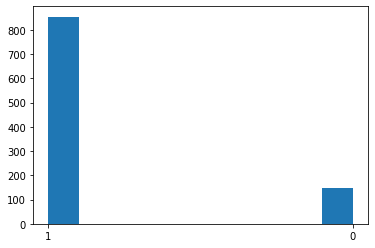

In [12]:
lastbit = []
for j in range(len(result.measurements)):
    lastbit.append("".join([str(result.measurements[j][2])]))

plt.hist(lastbit)
plt.show()

In [14]:
bins,counts = np.unique(lastbit, return_counts = True)
print(bins,counts)

['0' '1'] [146 854]


---